In [7]:
#작업 경로 설정
import os

#현 작업 진행 경로 확인
os.getcwd() #current work directory

#작업 경로 변경
os.chdir('/Users/rael/Downloads/data/project')
os.getcwd()

'/Users/rael/Downloads/data/project'

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.font_manager as fm

%precision 3
%matplotlib inline

In [9]:
# 글꼴 경로 설정
font_path = '/Users/rael/Library/Fonts/SCDream3.otf'
# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트 설정
plt.rc('font', family=font_name)

#마이너스 '-' 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [10]:
#데이터 불러오기
food = pd.read_csv('food_clean.csv')
food.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L003,A,주간,O8,26.4,42.9,99.92,0,양품
1,L029,B,주간,O2,24.3,57.7,101.77,0,양품
2,L035,A,주간,O4,23.5,44.3,99.82,0,양품
3,L039,C,주간,O3,24.4,38.2,100.60,0,양품
4,L018,A,야간,O9,26.5,44.4,99.76,0,양품


y: Weight vs Defect_Type
- 보통 y는 숫자형(연속형)을 선택하는 것이 유리.
- Defect_Type는 범주형이므로 참고용으로 활용하자!

In [11]:
#X와 Y간에 다중공산성이 있는지 그리고 변수 간에 상관성을 보기 위해 상관계수 산출
print(food.loc[ : , ['Temp', 'Humidity', 'Weight']].corr())

              Temp  Humidity    Weight
Temp      1.000000  0.097190 -0.007203
Humidity  0.097190  1.000000  0.048518
Weight   -0.007203  0.048518  1.000000


In [12]:
#디중회귀분석 수행
reg2 = smf.ols('Weight ~ Temp + Humidity', data=food).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5308
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.589
Time:                        13:49:19   Log-Likelihood:                -863.58
No. Observations:                 427   AIC:                             1733.
Df Residuals:                     424   BIC:                             1745.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.2941      1.314     75.566      0.000      96.711     101.877
Temp          -0.0104      0.042     -0.247      0.805      -0.093       0.072
Humidity       0.0182      0.018      1.020      0.309      -0.017       0.053
==============================================================================
Omnibus:                      122.042   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7069.581
Skew:                           0.074   Prob(JB):                         0.00
Kurtosis:                      22.933   Cond. No.                         830.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
reg3 = smf.ols('Weight ~ Temp + Humidity + C(Line) + C(Shift) + C(Operator)', data=food).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.037
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.415
Time:                        13:49:20   Log-Likelihood:                -856.71
No. Observations:                 427   AIC:                             1743.
Df Residuals:                     412   BIC:                             1804.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             99.1685      1

In [14]:
error_smf = smf.logit('Defect ~ Temp + Humidity + C(Line) + C(Shift) + C(Operator)', data=food).fit()
print(error_smf.summary())

Optimization terminated successfully.
         Current function value: 0.278850
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Defect   No. Observations:                  427
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                           14
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                 0.05385
Time:                        13:49:20   Log-Likelihood:                -119.07
converged:                       True   LL-Null:                       -125.85
Covariance Type:            nonrobust   LLR p-value:                    0.4835
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.3493      2.683     -1.248      0.212      -8.609       1.910
C(Lin

In [15]:
# 기본 패키지
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 이항로지스틱 패키지
from sklearn.linear_model import LogisticRegression # 이항 로지스틱 회귀분석을 위한 패키지
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # 데이터 분할을 위한 패키지
from sklearn.metrics import accuracy_score, confusion_matrix # 분석 결과 확인을 위한 패키지
from sklearn.metrics import roc_curve, roc_auc_score # ROC 커브를 그리기 위한 패키지

# CART
from sklearn import tree # CART 분석을 하기 위한 패키지
from sklearn.tree import DecisionTreeClassifier, export_text #의사결정나무 분류 및 규칙 확인을 위한 패키지
from sklearn.tree import DecisionTreeRegressor # 의사결정나무 회귀
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 의사결정나무 분류모형 성능 평가

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트를 위한 패키지(분류)
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트를 위한 패키지(회귀)
from sklearn.metrics import accuracy_score, confusion_matrix # 분석 결과 확인을 위한 패키지

# 서포트 벡터 머신 (SVM)
from sklearn import svm

# k-fold 교차 검증
from sklearn.model_selection import KFold

from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수만 인코딩
cols = ['Line', 'Shift', 'Operator']
for col in cols:
    food[col] = LabelEncoder().fit_transform(food[col])

# 다시 x, y 정의
x = food.loc[:, 'Line':'Humidity']
y = food['Weight']

In [17]:
# 데이터 분할하기 2
# Training과 Test로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1234) #시드넘버
y_train.shape

(298,)

In [18]:
# CART 알고리즘을 이용한 모델 적합(예측)
model = DecisionTreeRegressor(random_state=1234,
                              max_depth = 3, #최대 깊이(단계)
                              min_samples_split = 4, #최소한의 표본개수
                              min_samples_leaf = 3 ) #최소 몇 개의 분할
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,4
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
#학습 모형의 규칙 확인
from sklearn.tree import export_text as ex
tree_rules = ex(model)
print('Decision Tree Rules: ')
print(tree_rules)

Decision Tree Rules: 
|--- feature_2 <= 8.50
|   |--- feature_4 <= 51.35
|   |   |--- feature_4 <= 49.45
|   |   |   |--- value: [99.91]
|   |   |--- feature_4 >  49.45
|   |   |   |--- value: [99.49]
|   |--- feature_4 >  51.35
|   |   |--- feature_3 <= 25.85
|   |   |   |--- value: [100.49]
|   |   |--- feature_3 >  25.85
|   |   |   |--- value: [99.90]
|--- feature_2 >  8.50
|   |--- feature_3 <= 26.00
|   |   |--- feature_3 <= 24.75
|   |   |   |--- value: [99.33]
|   |   |--- feature_3 >  24.75
|   |   |   |--- value: [100.54]
|   |--- feature_3 >  26.00
|   |   |--- feature_3 <= 26.35
|   |   |   |--- value: [93.93]
|   |   |--- feature_3 >  26.35
|   |   |   |--- value: [99.67]



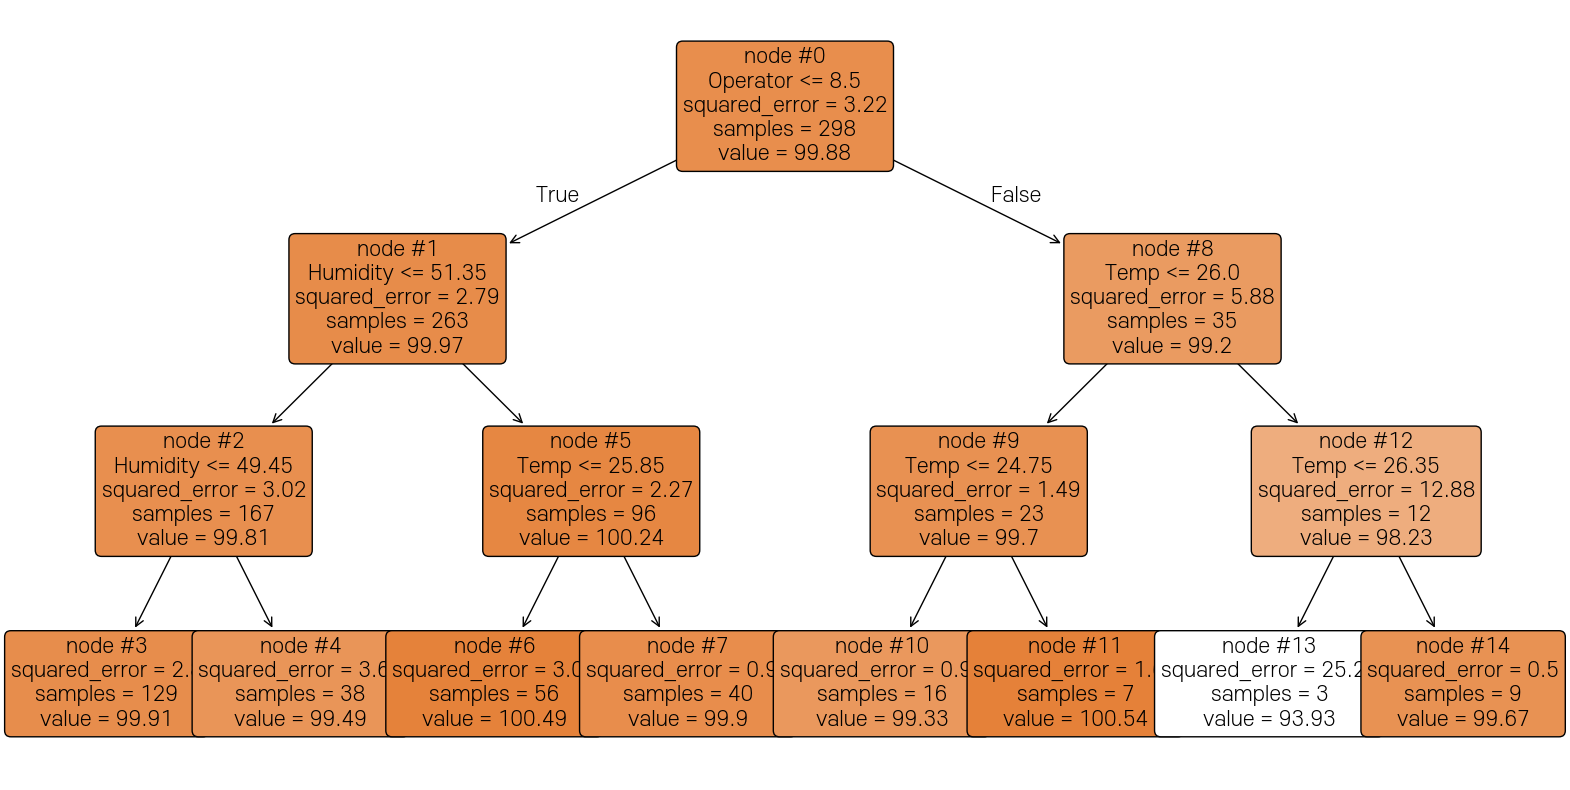

In [20]:
#모델 시각화
fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(model,
               feature_names = x_train.columns, #feture의 이름으로 지정(열 이름으로 지정)
               filled = True,
               rounded = True,
               precision = 2,
               fontsize = 15,
               node_ids = True,
               label = 'all') 
plt.show()

In [21]:
#모형 검증(Test dataset)
y_pred = model.predict(x_test)
y_pred

array([100.489,  99.67 ,  99.334,  99.9  , 100.539,  99.911,  99.911,
        99.911, 100.489,  99.9  ,  99.334, 100.489, 100.489,  99.911,
       100.489,  99.911, 100.489,  99.911,  99.487,  99.911,  99.911,
        99.911,  99.487, 100.489,  99.911,  99.911,  99.487,  99.911,
        99.911, 100.489,  99.9  , 100.489, 100.489,  99.487,  99.487,
        99.487,  99.911,  99.9  ,  99.911,  99.9  ,  99.334,  99.487,
        99.911,  99.9  ,  99.9  ,  99.911, 100.489, 100.489,  99.911,
        99.911,  99.487, 100.489, 100.539,  99.9  ,  99.9  , 100.489,
       100.489,  99.9  ,  99.911,  99.67 ,  99.911,  99.911,  99.487,
        99.911,  99.911,  99.334,  99.911,  99.911,  99.911,  99.67 ,
        99.9  ,  99.911,  99.334, 100.489, 100.489,  99.911,  99.911,
        99.911,  99.9  ,  99.911,  99.487, 100.489, 100.489,  99.911,
        99.911, 100.489,  99.911,  99.9  ,  99.487,  99.911,  99.334,
        99.911,  99.911,  99.911,  99.911,  99.911,  99.911,  99.911,
        99.334,  99.

In [22]:
#모형 성능 평가(예측)
#MSE, R-squere, ...
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2 #R-square

In [23]:
# MSE -> 분산
mse_val = mse(y_test, y_pred)
print('mse: ', mse_val)
# RMSE -> 표준편차
print('rmse: ', np.sqrt(mse_val))
# r-squre
print('r-squre: ', r2(y_test, y_pred))

mse:  3.98324262860669
rmse:  1.9958062602884805
r-squre:  -0.09683123262388671


In [24]:
# 변수 중요도
impo = model.feature_importances_
impo

array([0.   , 0.   , 0.131, 0.752, 0.117])

<Axes: xlabel='None', ylabel='None'>

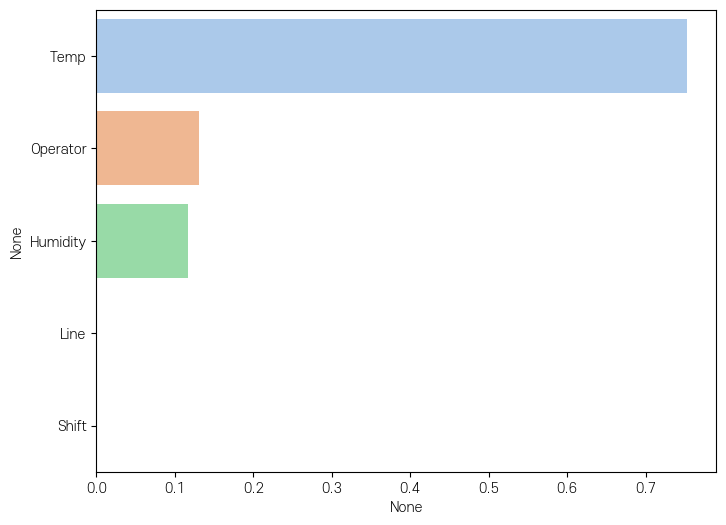

In [25]:
#시각화
impo_se = pd.Series(impo, index=x_train.columns)
top = impo_se.sort_values(ascending = False)[:20] #20개만!
plt.figure(figsize=(8,6))
sns.barplot(x = top, y = top.index, palette='pastel')
#hue or palette로 색깔 지정

### CART

In [26]:
# 이상치 제거 데이터 버전
food_clean = pd.read_csv('food_clean+remove_outlier.csv')
food_clean.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L003,A,주간,O8,26.4,42.9,99.92,0,양품
1,L029,B,주간,O2,24.3,57.7,101.77,0,양품
2,L035,A,주간,O4,23.5,44.3,99.82,0,양품
3,L039,C,주간,O3,24.4,38.2,100.60,0,양품
4,L018,A,야간,O9,26.5,44.4,99.76,0,양품


In [27]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수만 인코딩
cols = ['Line', 'Shift', 'Operator']
for col in cols:
    food_clean[col] = LabelEncoder().fit_transform(food_clean[col]) # 전처리 진행된 데이터

# 다시 x, y 정의
x_c = food_clean.loc[:, 'Line':'Humidity']
y_c = food_clean['Weight']

In [28]:
# 데이터 분할하기 2
# Training과 Test로 분할
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3, random_state = 1234) #시드넘버
y_train.shape

(290,)

In [29]:
# CART 알고리즘을 이용한 모델 적합(예측)
model = DecisionTreeRegressor(random_state=1234,
                              max_depth = 3, #최대 깊이(단계)
                              min_samples_split = 4, #최소한의 표본개수
                              min_samples_leaf = 3 ) #최소 몇 개의 분할
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,4
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
#학습 모형의 규칙 확인
from sklearn.tree import export_text as ex
tree_rules = ex(model)
print('Decision Tree Rules: ')
print(tree_rules)

Decision Tree Rules: 
|--- feature_4 <= 56.70
|   |--- feature_2 <= 5.50
|   |   |--- feature_4 <= 45.65
|   |   |   |--- value: [99.71]
|   |   |--- feature_4 >  45.65
|   |   |   |--- value: [100.08]
|   |--- feature_2 >  5.50
|   |   |--- feature_4 <= 40.75
|   |   |   |--- value: [100.68]
|   |   |--- feature_4 >  40.75
|   |   |   |--- value: [99.66]
|--- feature_4 >  56.70
|   |--- feature_3 <= 25.30
|   |   |--- feature_3 <= 24.20
|   |   |   |--- value: [100.48]
|   |   |--- feature_3 >  24.20
|   |   |   |--- value: [101.70]
|   |--- feature_3 >  25.30
|   |   |--- feature_1 <= 0.50
|   |   |   |--- value: [99.72]
|   |   |--- feature_1 >  0.50
|   |   |   |--- value: [100.41]



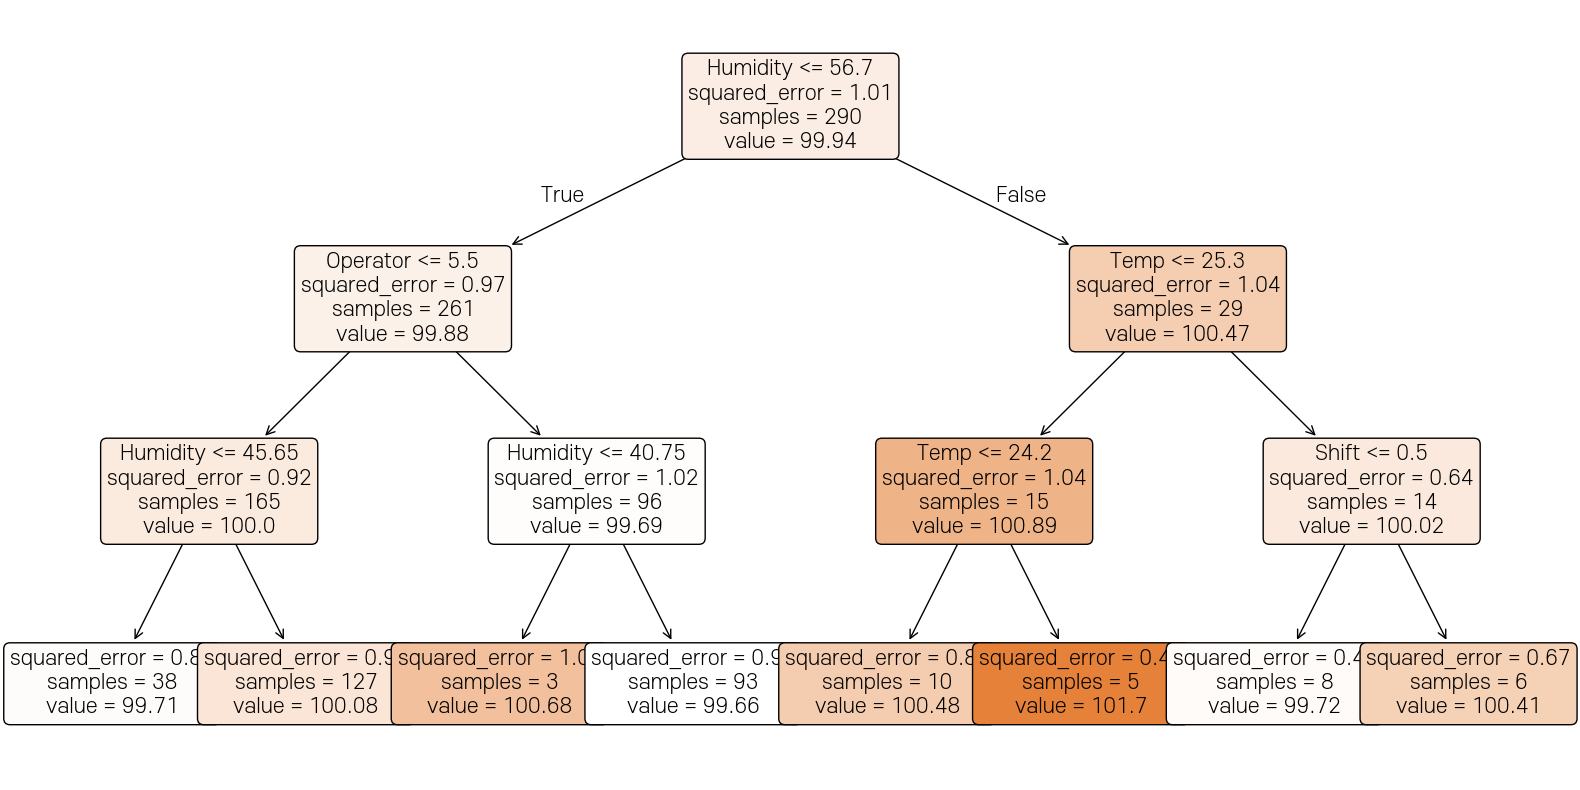

In [31]:
#모델 시각화
fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(model,
               feature_names = x_train.columns, #feture의 이름으로 지정(열 이름으로 지정)
               filled = True,
               rounded = True,
               precision = 2,
               fontsize = 15) 
plt.show()

In [32]:
#모형 검증(Test dataset)
y_pred = model.predict(x_test)
y_pred

array([ 99.655,  99.655, 100.081,  99.655, 100.081, 100.081, 100.081,
        99.655, 101.698,  99.655,  99.655, 100.081,  99.655, 100.081,
        99.655,  99.655, 100.081, 100.081,  99.655, 100.081, 100.081,
       100.081,  99.655,  99.71 ,  99.655, 100.081,  99.71 , 100.081,
        99.655, 100.081,  99.71 ,  99.655,  99.655, 100.081, 100.081,
       100.081, 100.081,  99.655, 100.081,  99.71 ,  99.655, 100.081,
        99.655,  99.655, 100.081,  99.655, 100.081,  99.655, 100.081,
       100.081, 100.081, 100.081, 100.481, 100.081, 100.081, 100.081,
        99.71 ,  99.655,  99.655, 100.081, 100.081, 100.081,  99.655,
        99.71 , 100.081, 100.081, 100.677, 100.081,  99.655,  99.655,
       100.081,  99.722,  99.71 , 100.081, 100.481, 100.081, 100.407,
        99.71 , 100.081,  99.655, 100.081, 100.081,  99.655, 100.081,
        99.655, 100.081,  99.655,  99.71 ,  99.655,  99.655, 100.081,
       100.081, 100.481, 100.081,  99.655,  99.71 ,  99.655, 100.081,
        99.655, 100.

In [33]:
#모형 성능 평가(예측)
#MSE, R-squere, ...
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2 #R-square

In [34]:
# MSE -> 분산
mse_val = mse(y_test, y_pred)
print('mse: ', mse_val)
# RMSE -> 표준편차
print('rmse: ', np.sqrt(mse_val))
# r-squre
print('r-squre: ', r2(y_test, y_pred))

mse:  1.1257846510493148
rmse:  1.061029995357961
r-squre:  -0.08767663832084249


In [35]:
# 변수 중요도
impo = model.feature_importances_
impo

array([0.   , 0.048, 0.171, 0.309, 0.473])

<Axes: xlabel='None', ylabel='None'>

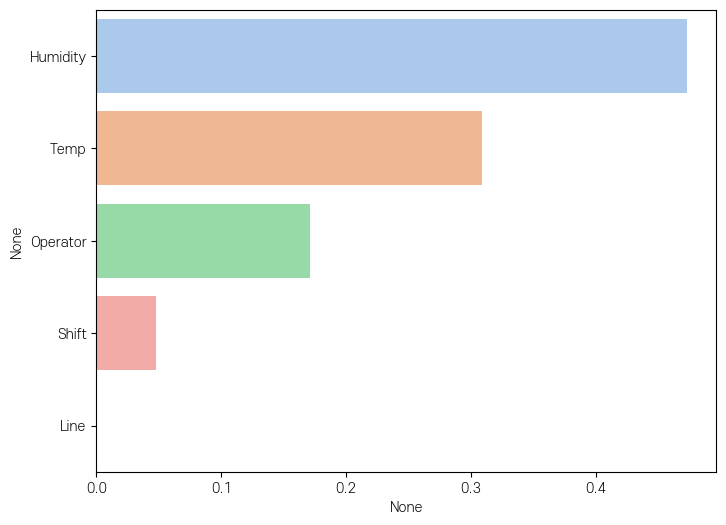

In [36]:
#시각화
impo_se = pd.Series(impo, index=x_train.columns)
top = impo_se.sort_values(ascending = False)[:20] #20개만!
plt.figure(figsize=(8,6))
sns.barplot(x = top, y = top.index, palette='pastel')
#hue or palette로 색깔 지정

### Random Forest

In [37]:
#데이터 분할 (X, Y)
# 범주형 변수만 인코딩
cols = ['Line', 'Shift', 'Operator']
for col in cols:
    food_clean[col] = LabelEncoder().fit_transform(food_clean[col]) # 전처리 진행된 데이터

# 다시 x, y 정의
x_c = food_clean.loc[:, 'Line':'Humidity']
y_c = food_clean['Weight']

In [38]:
#데이터 분할
#학습/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3, random_state = 1234) #시드넘버
len(y_train)

290

In [39]:
#모형 학습(Training 데이터 세트로 모형 학습)
#최적의 모형 찾기(하이퍼 파라미터 튜닝)
#Grid Search 방법
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

#파라미터 값으로 넣을 숫자 정리 (여기의 설정 값 중 가장 최적의 값을 찾습니다.)
params = { 'n_estimators': (100, 200),
          'max_depth': (2, 10, 30),
          'min_samples_leaf': (2, 5, 10),
          'min_samples_split': (1, 2, 30)}

rf_run = RandomForestRegressor(random_state = 1234) # 모델 적합
grid_cv = GridSearchCV(rf_run, param_grid = params, cv=2)
grid_cv.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_cv.best_params_)

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
#최적의 모델로 예측 및 평가(검증)
best_rf = grid_cv.best_estimator_
y_pred = best_rf.predict(x_test)
y_pred

array([ 99.754,  99.773,  99.986,  99.787,  99.935,  99.971,  99.95 ,
        99.806, 100.307,  99.792,  99.793,  99.955,  99.907,  99.972,
        99.96 ,  99.924, 100.012,  99.953,  99.75 ,  99.952,  99.977,
        99.972,  99.767,  99.877,  99.777, 100.065,  99.864,  99.96 ,
        99.763,  99.968,  99.893,  99.796,  99.787,  99.946,  99.975,
        99.94 ,  99.957,  99.777, 100.001,  99.881,  99.763,  99.938,
        99.821,  99.776, 100.01 ,  99.674, 100.044,  99.821, 100.015,
        99.932,  99.949, 100.019, 100.314, 100.02 ,  99.971,  99.979,
       100.02 ,  99.756,  99.786,  99.982,  99.992, 100.011,  99.758,
        99.857,  99.995,  99.964,  99.92 ,  99.995, 100.002,  99.837,
       100.066, 100.261,  99.877,  99.977, 100.331,  99.907, 100.216,
        99.869, 100.111,  99.696,  99.982,  99.919,  99.869,  99.953,
        99.709,  99.967,  99.848,  99.849,  99.946,  99.786,  99.996,
        99.961, 100.353,  99.925,  99.772, 100.056,  99.787,  99.973,
        99.726,  99.

In [41]:
#모형의 성능 평가(RMSE, R^2)
#RMSE
rf_mse = mse(y_test, y_pred)
rf_rmse = mse_val ** 0.5
#R-Squere
rf_r_sq = r2(y_test, y_pred) * 100
rf_r_sq
rf_rmse, rf_r_sq

(1.061, -1.632)

In [42]:
impo2 = best_rf.feature_importances_
impo2

array([0.032, 0.02 , 0.206, 0.201, 0.542])

<Axes: xlabel='None', ylabel='None'>

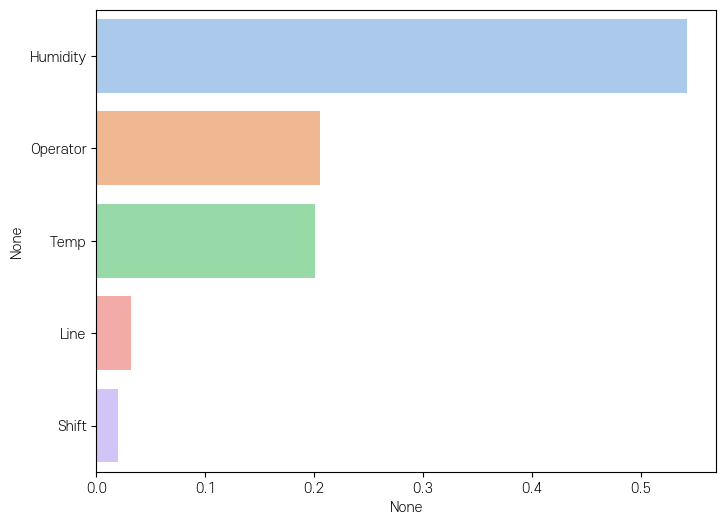

In [43]:
#시각화
impo_se = pd.Series(impo2, index=x_train.columns)
top = impo_se.sort_values(ascending = False)[:20] #20개만!
plt.figure(figsize=(8,6))
sns.barplot(x = top, y = top.index, palette='pastel')
#hue or palette로 색깔 지정

### 모델 성능 개선

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Thresholding
y_class_true = [(1 if 99 <= w <= 101 else 0) for w in y_test]
y_class_pred = [(1 if 99 <= w <= 101 else 0) for w in y_pred]

# 평가
acc = accuracy_score(y_class_true, y_class_pred)
cm = confusion_matrix(y_class_true, y_class_pred)
report = classification_report(y_class_true, y_class_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy: 0.672
Confusion Matrix:
 [[ 0 41]
 [ 0 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.67      1.00      0.80        84

    accuracy                           0.67       125
   macro avg       0.34      0.50      0.40       125
weighted avg       0.45      0.67      0.54       125



In [45]:
#최적의 모델로 예측 및 평가(검증)
best_rf = grid_cv.best_estimator_
y_pred = best_rf.predict(x_test)
y_pred

array([ 99.754,  99.773,  99.986,  99.787,  99.935,  99.971,  99.95 ,
        99.806, 100.307,  99.792,  99.793,  99.955,  99.907,  99.972,
        99.96 ,  99.924, 100.012,  99.953,  99.75 ,  99.952,  99.977,
        99.972,  99.767,  99.877,  99.777, 100.065,  99.864,  99.96 ,
        99.763,  99.968,  99.893,  99.796,  99.787,  99.946,  99.975,
        99.94 ,  99.957,  99.777, 100.001,  99.881,  99.763,  99.938,
        99.821,  99.776, 100.01 ,  99.674, 100.044,  99.821, 100.015,
        99.932,  99.949, 100.019, 100.314, 100.02 ,  99.971,  99.979,
       100.02 ,  99.756,  99.786,  99.982,  99.992, 100.011,  99.758,
        99.857,  99.995,  99.964,  99.92 ,  99.995, 100.002,  99.837,
       100.066, 100.261,  99.877,  99.977, 100.331,  99.907, 100.216,
        99.869, 100.111,  99.696,  99.982,  99.919,  99.869,  99.953,
        99.709,  99.967,  99.848,  99.849,  99.946,  99.786,  99.996,
        99.961, 100.353,  99.925,  99.772, 100.056,  99.787,  99.973,
        99.726,  99.

In [46]:
#모형의 성능 평가(RMSE, R^2)
#RMSE
rf_mse = mse(y_test, y_pred)
rf_rmse = mse_val ** 0.5
#R-Squere
rf_r_sq = r2(y_test, y_pred) * 100
rf_r_sq
rf_rmse, rf_r_sq

(1.061, -1.632)

In [47]:
impo2 = best_rf.feature_importances_
impo2

array([0.032, 0.02 , 0.206, 0.201, 0.542])

<Axes: xlabel='None', ylabel='None'>

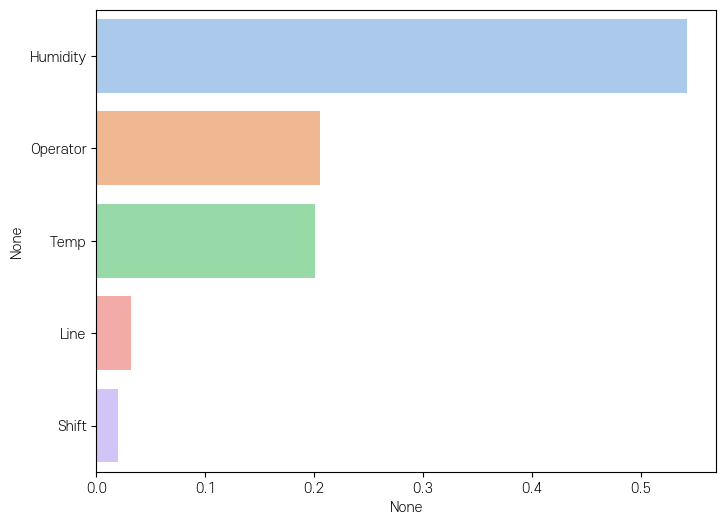

In [48]:
#시각화
impo_se = pd.Series(impo2, index=x_train.columns)
top = impo_se.sort_values(ascending = False)[:20] #20개만!
plt.figure(figsize=(8,6))
sns.barplot(x = top, y = top.index, palette='pastel')
#hue or palette로 색깔 지정

In [49]:
food_final = pd.read_csv('food_clean+remove_outlier_수정.csv')

In [50]:
reg3 = smf.ols('Weight ~ Temp + Humidity + C(Line) + C(Shift) + C(Operator)', data=food_final).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     68.23
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.53e-94
Time:                        13:49:43   Log-Likelihood:                -261.31
No. Observations:                 396   AIC:                             552.6
Df Residuals:                     381   BIC:                             612.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             98.2887      0

In [51]:
from sklearn.preprocessing import LabelEncoder

# 다시 x, y 정의
x_f = food_final.loc[:, 'Temp':'Humidity']
y_f = food_final['Weight']

In [52]:
# 데이터 분할하기 2
# Training과 Test로 분할
x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size = 0.3, random_state = 1234) #시드넘버
y_train.shape

(277,)

In [53]:
# CART 알고리즘을 이용한 모델 적합(예측)
model = DecisionTreeRegressor(random_state=1234,
                              max_depth = 4, #최대 깊이(단계)
                              min_samples_split = 4, #최소한의 표본개수
                              min_samples_leaf = 3 ) #최소 몇 개의 분할
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,4
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [54]:
#학습 모형의 규칙 확인
from sklearn.tree import export_text as ex
tree_rules = ex(model)
print('Decision Tree Rules: ')
print(tree_rules)

Decision Tree Rules: 
|--- feature_0 <= 25.65
|   |--- feature_1 <= 51.25
|   |   |--- feature_1 <= 45.45
|   |   |   |--- feature_0 <= 23.65
|   |   |   |   |--- value: [100.18]
|   |   |   |--- feature_0 >  23.65
|   |   |   |   |--- value: [100.71]
|   |   |--- feature_1 >  45.45
|   |   |   |--- feature_0 <= 22.65
|   |   |   |   |--- value: [99.25]
|   |   |   |--- feature_0 >  22.65
|   |   |   |   |--- value: [99.95]
|   |--- feature_1 >  51.25
|   |   |--- feature_0 <= 23.35
|   |   |   |--- feature_0 <= 21.40
|   |   |   |   |--- value: [97.96]
|   |   |   |--- feature_0 >  21.40
|   |   |   |   |--- value: [98.60]
|   |   |--- feature_0 >  23.35
|   |   |   |--- feature_1 <= 56.25
|   |   |   |   |--- value: [99.48]
|   |   |   |--- feature_1 >  56.25
|   |   |   |   |--- value: [98.88]
|--- feature_0 >  25.65
|   |--- feature_1 <= 52.85
|   |   |--- feature_1 <= 46.70
|   |   |   |--- feature_0 <= 26.55
|   |   |   |   |--- value: [100.92]
|   |   |   |--- feature_0 >  26.55

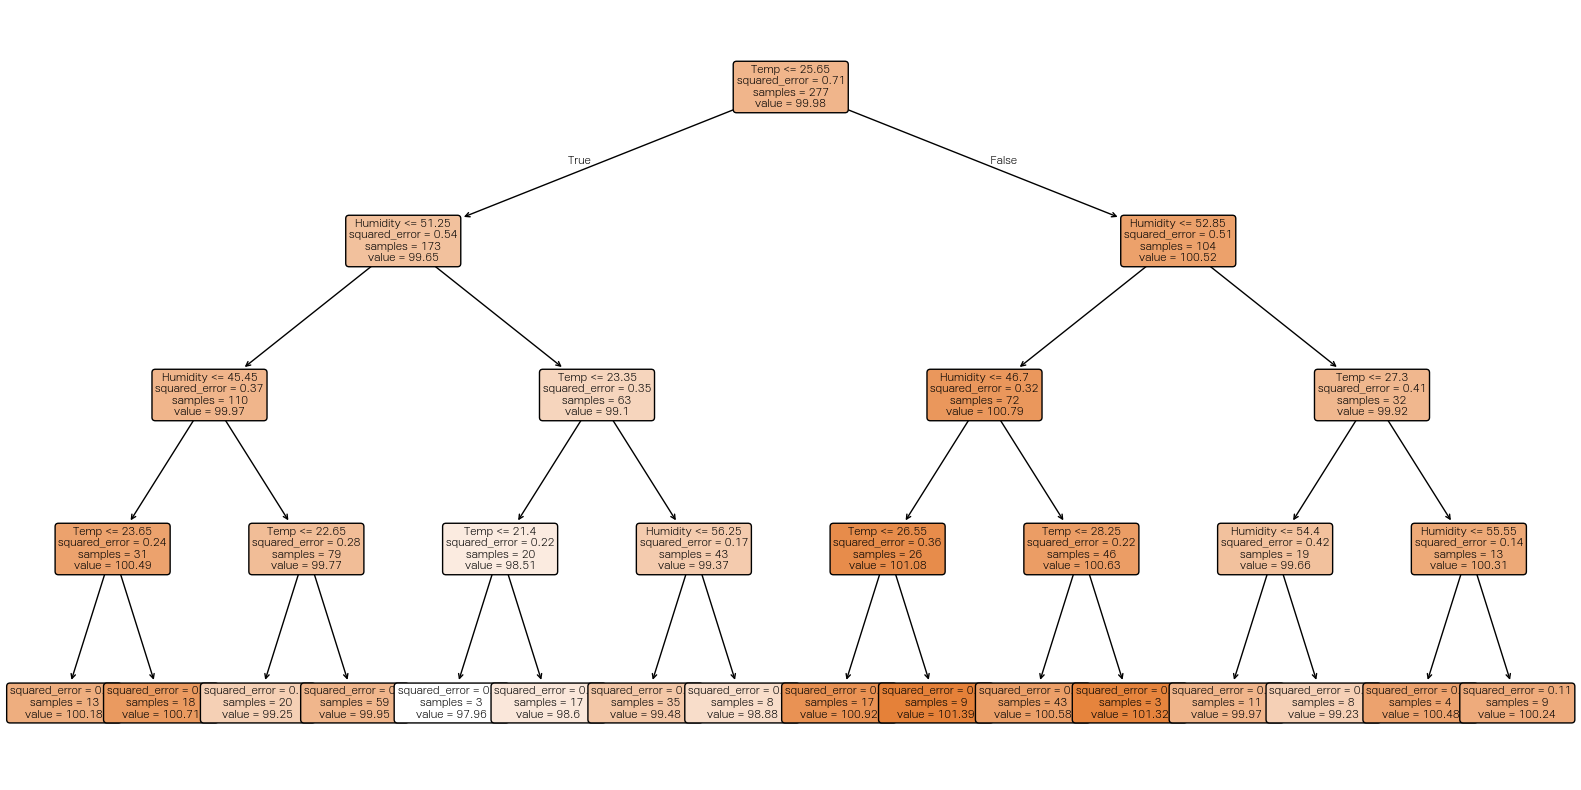

In [113]:
#모델 시각화
fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(model,
               feature_names = x_train.columns, #feture의 이름으로 지정(열 이름으로 지정)
               filled = True,
               rounded = True,
               precision = 2,
               fontsize = 8) 
plt.show()

In [56]:
#모형 검증(Test dataset)
y_pred = model.predict(x_test)
y_pred

array([100.578,  99.23 , 100.578,  99.948,  98.602,  99.484,  99.23 ,
       100.578, 101.324, 100.578,  99.948,  99.948, 100.175, 100.578,
        98.883, 100.578,  97.961,  99.948, 101.395, 101.395,  99.23 ,
       100.578,  99.948,  99.252,  99.484,  99.948,  99.23 , 100.918,
       100.24 ,  98.883,  99.948, 100.578,  98.602,  99.484,  99.948,
        99.23 ,  99.948,  99.484,  98.602, 101.324, 101.324, 100.578,
        99.948, 101.395, 100.578,  98.602,  99.948,  98.602, 100.578,
       100.918, 100.24 ,  99.23 ,  99.484, 100.918,  99.484, 101.395,
        99.97 , 100.175, 100.578,  99.948,  99.252,  99.484,  99.484,
        99.252,  99.97 ,  99.948, 100.578, 101.324,  99.948,  99.97 ,
        98.602, 100.175, 100.578, 100.578,  98.883,  99.948,  99.23 ,
       100.578, 101.395,  99.484, 100.578,  99.948, 100.175,  98.602,
       101.395,  98.883,  99.948,  99.948, 100.578, 100.71 ,  99.484,
        99.252, 101.395, 100.71 , 100.578, 101.395, 100.71 ,  98.883,
        99.948, 100.

In [57]:
#모형 성능 평가(예측)
#MSE, R-squere, ...
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2 #R-square

In [58]:
# MSE -> 분산
mse_val = mse(y_test, y_pred)
print('mse: ', mse_val)
# RMSE -> 표준편차
print('rmse: ', np.sqrt(mse_val))
# r-squre
print('r-squre: ', r2(y_test, y_pred))

mse:  0.3729200532244854
rmse:  0.6106718048383153
r-squre:  0.5908017190817416


In [59]:
# 변수 중요도
impo = model.feature_importances_
impo

array([0.531, 0.469])

<Axes: xlabel='None', ylabel='None'>

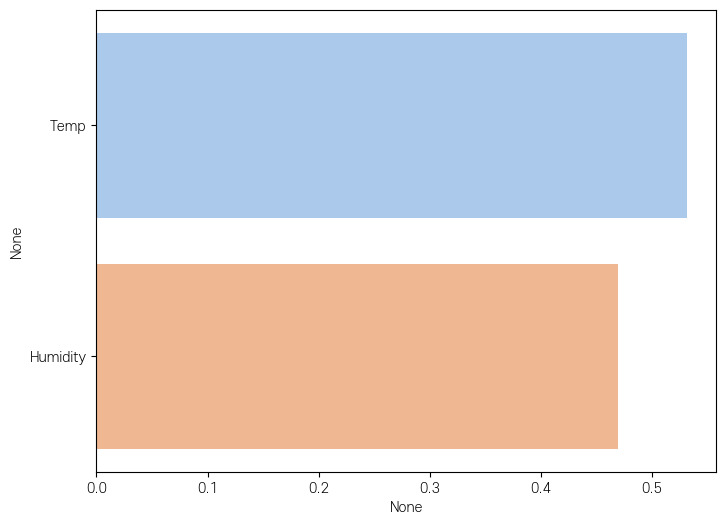

In [60]:
#시각화
impo_se = pd.Series(impo, index=x_train.columns)
top = impo_se.sort_values(ascending = False)[:20] #20개만!
plt.figure(figsize=(8,6))
sns.barplot(x = top, y = top.index, palette='pastel')
#hue or palette로 색깔 지정

- 성능 개선 필요: r-square 0.59 이므로 데이터의 59%만 설명 가능
- 깊이를 늘려 개선 해보겠음!

### CART 모델 성능 개선

In [61]:
# CART 알고리즘을 이용한 모델 적합(예측)
model2 = DecisionTreeRegressor(random_state=1234,
                              max_depth = 10, #최대 깊이(단계)
                              min_samples_split = 5, #최소한의 표본개수
                              min_samples_leaf = 2) #최소 몇 개의 분할
model2.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1234
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [62]:
#학습 모형의 규칙 확인
from sklearn.tree import export_text as ex
tree_rules = ex(model2)
print('Decision Tree Rules: ')
print(tree_rules)

Decision Tree Rules: 
|--- feature_0 <= 25.65
|   |--- feature_1 <= 51.25
|   |   |--- feature_1 <= 45.45
|   |   |   |--- feature_0 <= 23.65
|   |   |   |   |--- feature_1 <= 42.65
|   |   |   |   |   |--- feature_1 <= 41.05
|   |   |   |   |   |   |--- value: [100.36]
|   |   |   |   |   |--- feature_1 >  41.05
|   |   |   |   |   |   |--- value: [100.64]
|   |   |   |   |--- feature_1 >  42.65
|   |   |   |   |   |--- feature_0 <= 22.30
|   |   |   |   |   |   |--- value: [100.08]
|   |   |   |   |   |--- feature_0 >  22.30
|   |   |   |   |   |   |--- value: [99.83]
|   |   |   |--- feature_0 >  23.65
|   |   |   |   |--- feature_0 <= 23.95
|   |   |   |   |   |--- value: [101.41]
|   |   |   |   |--- feature_0 >  23.95
|   |   |   |   |   |--- feature_0 <= 24.35
|   |   |   |   |   |   |--- feature_0 <= 24.15
|   |   |   |   |   |   |   |--- value: [100.64]
|   |   |   |   |   |   |--- feature_0 >  24.15
|   |   |   |   |   |   |   |--- value: [100.16]
|   |   |   |   |   |--- fea

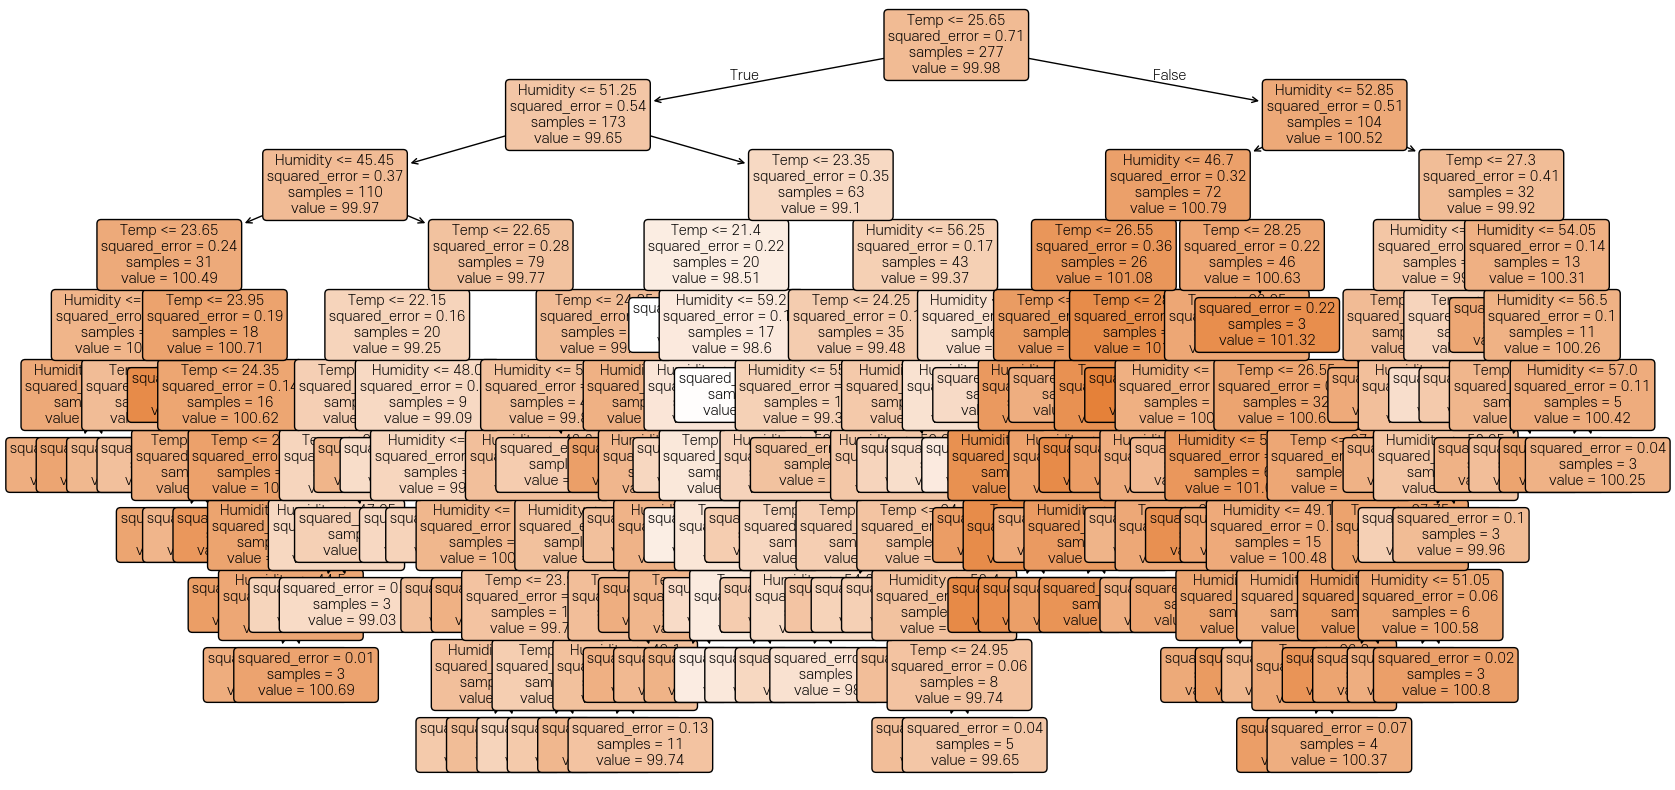

In [63]:
#모델 시각화
fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(model2,
               feature_names = x_train.columns, #feture의 이름으로 지정(열 이름으로 지정)
               filled = True,
               rounded = True,
               precision = 2,
               fontsize = 10) 
plt.show()

In [64]:
#모형 검증(Test dataset)
y_pred = model2.predict(x_test)

# MSE -> 분산
mse_val = mse(y_test, y_pred)
print('mse: ', mse_val)
# RMSE -> 표준편차
print('rmse: ', np.sqrt(mse_val))
# r-squre
print('r-squre: ', r2(y_test, y_pred))

mse:  0.5376087240034796
rmse:  0.7332180603364047
r-squre:  0.41009188493155


- 최선의 학습이었네요
- 하이퍼 파라미터 변경은 유의미한 차이 X(min_leaf) or 성능이 떨어짐(max_depth)

### Random Forest

In [114]:
#데이터 분할 (X, Y)

# 다시 x, y 정의
x_c = food_final.loc[:, 'Temp':'Humidity']
y_c = food_final['Weight']

In [115]:
#데이터 분할
#학습/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3, random_state = 1234) #시드넘버
len(y_train)

277

In [67]:
#모형 학습(Training 데이터 세트로 모형 학습)
#최적의 모형 찾기(하이퍼 파라미터 튜닝)
#Grid Search 방법
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

#파라미터 값으로 넣을 숫자 정리 (여기의 설정 값 중 가장 최적의 값을 찾습니다.)
params = { 'n_estimators': (100, 200),
          'max_depth': (2, 10, 30),
          'min_samples_leaf': (2, 5, 10),
          'min_samples_split': (1, 2, 30)}

rf_run = RandomForestRegressor(random_state = 1234) # 모델 적합
grid_cv = GridSearchCV(rf_run, param_grid = params, cv=5)
grid_cv.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_cv.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [68]:
#최적의 모델로 예측 및 평가(검증)
best_rf = grid_cv.best_estimator_
y_pred = best_rf.predict(x_test)
y_pred

array([100.184,  99.339, 100.666,  99.745,  98.442,  99.709,  99.49 ,
       100.622, 100.71 , 100.347, 100.111,  99.982,  99.798, 100.486,
        98.941, 100.362,  98.528, 100.081, 101.115, 101.234,  99.352,
       100.802,  99.857,  99.194,  99.534, 100.194,  99.463, 100.788,
       100.194,  99.043,  99.796, 100.301,  98.459,  99.358, 100.465,
        99.229,  99.628,  99.439,  98.604, 100.799, 100.802, 100.673,
        99.765, 101.134, 100.505,  98.672,  99.825,  98.654, 100.536,
       100.83 , 100.224,  99.244,  99.321, 100.824,  99.527, 101.297,
        99.994, 100.128, 100.709,  99.826,  99.294,  98.873,  99.25 ,
        99.334,  99.998, 100.494, 100.628, 100.989, 100.117,  99.904,
        98.807, 100.238, 100.677, 100.799,  99.155, 100.138,  99.409,
       100.599, 100.955,  99.49 , 100.747, 100.143, 100.076,  98.433,
       101.403,  98.942, 100.186, 100.178, 100.565, 100.459,  99.226,
        99.248, 101.228, 100.741, 100.694, 101.355, 100.686,  99.048,
        99.794, 100.

In [69]:
#모형의 성능 평가(RMSE, R^2)
#RMSE
rf_mse = mse(y_test, y_pred)
rf_rmse = mse_val ** 0.5
#R-Squere
rf_r_sq = r2(y_test, y_pred) * 100
rf_r_sq
rf_rmse, rf_r_sq

(0.733, 63.282)

In [70]:
impo2 = best_rf.feature_importances_
impo2

array([0.511, 0.489])

<Axes: xlabel='None', ylabel='None'>

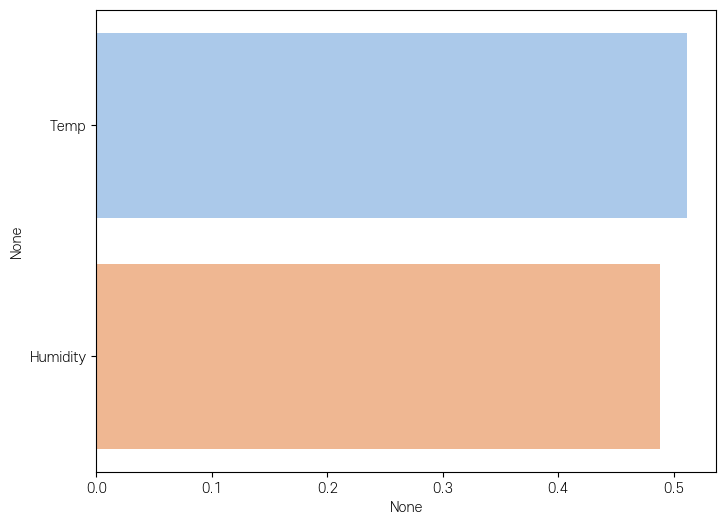

In [71]:
#시각화
impo_se = pd.Series(impo2, index=x_train.columns)
top = impo_se.sort_values(ascending = False)[:20] #20개만!
plt.figure(figsize=(8,6))
sns.barplot(x = top, y = top.index, palette='pastel')
#hue or palette로 색깔 지정

In [116]:
#모형 학습(Training 데이터 세트로 모형 학습) 
#최적의 모형 찾기(하이퍼 파라미터 튜닝) 
#Grid Search 방법 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error as mse 

#파라미터 값으로 넣을 숫자 정리 (여기의 설정 값 중 가장 최적의 값을 찾습니다.) 
params = { 'n_estimators': (100, 200), 'max_depth': (2, 10, 30), 'min_samples_leaf': (2, 5, 10), 'min_samples_split': (1, 2, 30)} 

rf_run = RandomForestRegressor(random_state = 1234) # 모델 적합 
grid_cv = GridSearchCV(rf_run, param_grid = params, cv=2) 
grid_cv.fit(x_train, y_train) 

# 최적의 하이퍼파라미터 출력 
print("Best Parameters:", grid_cv.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [117]:
#최적의 모델로 예측 및 평가(검증)
best_rf = grid_cv.best_estimator_
y_pred = best_rf.predict(x_test)
y_pred

array([100.199,  99.311, 100.671,  99.753,  98.432,  99.717,  99.439,
       100.591, 100.726, 100.353, 100.124, 100.018,  99.715, 100.485,
        98.93 , 100.346,  98.533, 100.093, 101.127, 101.243,  99.325,
       100.777,  99.874,  99.171,  99.503, 100.229,  99.437, 100.784,
       100.189,  99.042,  99.794, 100.294,  98.478,  99.358, 100.495,
        99.204,  99.624,  99.436,  98.622, 100.802, 100.807, 100.68 ,
        99.732, 101.14 , 100.524,  98.658,  99.812,  98.682, 100.52 ,
       100.806, 100.225,  99.228,  99.316, 100.797,  99.517, 101.299,
       100.033, 100.065, 100.702,  99.832,  99.273,  98.883,  99.212,
        99.325, 100.037, 100.55 , 100.626, 100.994, 100.12 ,  99.894,
        98.758, 100.214, 100.67 , 100.811,  99.159, 100.123,  99.394,
       100.593, 100.945,  99.467, 100.732, 100.148, 100.054,  98.471,
       101.403,  98.906, 100.186, 100.17 , 100.552, 100.446,  99.198,
        99.226, 101.239, 100.768, 100.673, 101.369, 100.675,  99.045,
        99.759, 100.

In [118]:
#모형의 성능 평가(RMSE, R^2)
#RMSE
rf_mse = mse(y_test, y_pred)
rf_rmse = mse_val ** 0.5
#R-Squere
rf_r_sq = r2(y_test, y_pred) * 100
rf_r_sq
rf_rmse, rf_r_sq

(0.733, 63.870)

### 모델 최적화 진행 가보자

In [124]:
#모형 학습(Training 데이터 세트로 모형 학습)
#최적의 모형 찾기(하이퍼 파라미터 튜닝)
#Grid Search 방법
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

#파라미터 값으로 넣을 숫자 정리 (여기의 설정 값 중 가장 최적의 값을 찾습니다.)
params = { 'n_estimators': (100, 200, 300, 500),
          'max_depth': (2, 3, 5, 7, 10, 15),
          'min_samples_leaf': (1, 2, 3, 5, 7, 10),
          'min_samples_split': (2, 4, 6, 8, 10)}

rf_run_try = RandomForestRegressor(random_state = 1234) # 모델 적합
grid_cv_try = GridSearchCV(rf_run_try, param_grid = params, cv=5)
grid_cv_try.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_cv_try.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [125]:
#최적의 모델로 예측 및 평가(검증)
best_rf = grid_cv_try.best_estimator_
y_pred = best_rf.predict(x_test)
y_pred

array([100.182,  99.43 , 100.669,  99.755,  98.519,  99.73 ,  99.655,
       100.616, 100.585, 100.352, 100.07 ,  99.952,  99.818, 100.49 ,
        99.001, 100.337,  98.601,  99.991, 101.16 , 101.175,  99.45 ,
       100.874,  99.844,  99.237,  99.56 , 100.189,  99.579, 100.886,
       100.179,  99.068,  99.796, 100.293,  98.463,  99.364, 100.415,
        99.361,  99.653,  99.501,  98.605, 100.675, 100.675, 100.7  ,
        99.741, 101.174, 100.543,  98.632,  99.798,  98.673, 100.52 ,
       100.833, 100.183,  99.358,  99.411, 100.827,  99.465, 101.15 ,
        99.968, 100.153, 100.644,  99.819,  99.285,  98.867,  99.196,
        99.347,  99.97 , 100.441, 100.591, 100.858, 100.153,  99.908,
        98.81 , 100.208, 100.706, 100.852,  99.183, 100.144,  99.497,
       100.643, 100.976,  99.52 , 100.733, 100.093, 100.141,  98.487,
       101.272,  98.961, 100.097, 100.096, 100.546, 100.521,  99.208,
        99.229, 101.168, 100.73 , 100.729, 101.251, 100.684,  99.028,
        99.778, 100.

In [126]:
#모형의 성능 평가(RMSE, R^2)
#RMSE
rf_mse = mse(y_test, y_pred)
rf_rmse = mse_val ** 0.5
#R-Squere
rf_r_sq = r2(y_test, y_pred) * 100
rf_r_sq
rf_rmse, rf_r_sq

(0.733, 63.579)